<a href="https://colab.research.google.com/github/egbubemi/Banck_Customer_Churning_Prediction/blob/main/Bank_Churn_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#import the necessary libraries

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#load the dataset
dataset = pd.read_csv("Bank Customer Churn Prediction.csv")

In [23]:
#view the first five rows of the dataset
dataset.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [24]:
#understand the shape of the dataframe....there are 1000 rows and 12 columns


dataset.shape

(10000, 12)

In [25]:
#analysing the datatypes

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [26]:
#evaluating the statistical details of the dataset, the transpose function is used so as to make sure that all
#columns are seen at a glance without any hidden columns

dataset.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
credit_score,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
country,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
products_number,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
credit_card,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
active_member,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0


In [27]:
#checking for any missen values in the dataset

dataset.isnull().sum().sum()

0

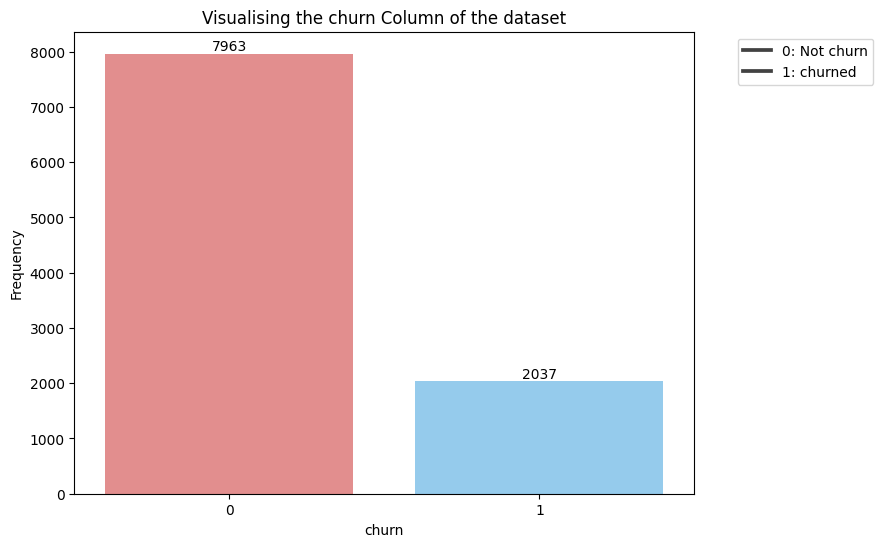

In [28]:
# Getting the Dataset Column "Class" distribution frequency
# Using sns.barplot to plots a histogram 
# of the values in the Class column of the DataFrame DFDivorceData

# Group by Class column and count values
churn_counts = dataset.groupby('churn')['churn'].count()

# Create bar plot
plt.figure(figsize=(8,6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=['#F08080', '#87CEFA'])

# Add labels and title
plt.xlabel('churn')
plt.ylabel('Frequency')
plt.title(f"Visualising the churn Column of the dataset")

# Show legend
legend_labels = ['High', 'Low']
plt.legend(['0: Not churn', '1: churned'], loc="upper right", bbox_to_anchor=(1.3, 1))

# Add frequency values on top of each bar
for index, value in enumerate(churn_counts):
    plt.annotate(str(value), xy=(index, value), ha='center', va='bottom')

# Display plot
plt.show()

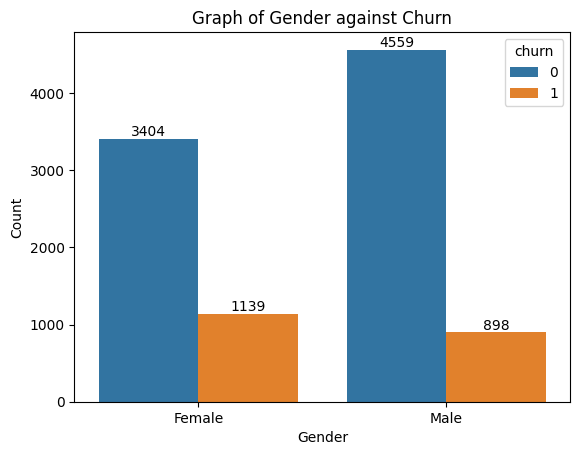

In [29]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the customer data in a DataFrame called 'dataset'

# Group by gender and churn
gender_churn = dataset.groupby(['gender', 'churn']).size().reset_index(name='count')

# Plot the bar chart
ax = sns.barplot(x='gender', y='count', hue='churn', data=gender_churn)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Graph of Gender against Churn')

# Add annotations to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


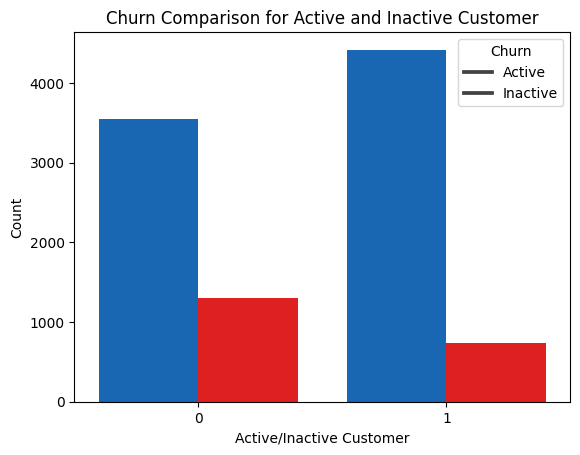

In [30]:
# Group by active_member and churn
active_churn = dataset.groupby(['active_member', 'churn']).size().reset_index(name='count')

# Define custom colors using hexadecimal color codes
colors = ["#06C", "#F00"]

# Plot the bar chart
sns.barplot(x='active_member', y='count', hue='churn', data=active_churn, palette=colors)
plt.xlabel('Active/Inactive Customer')
plt.ylabel('Count')
plt.title('Churn Comparison for Active and Inactive Customer')
plt.legend(title='Churn', labels=['Active', 'Inactive'])
plt.show()


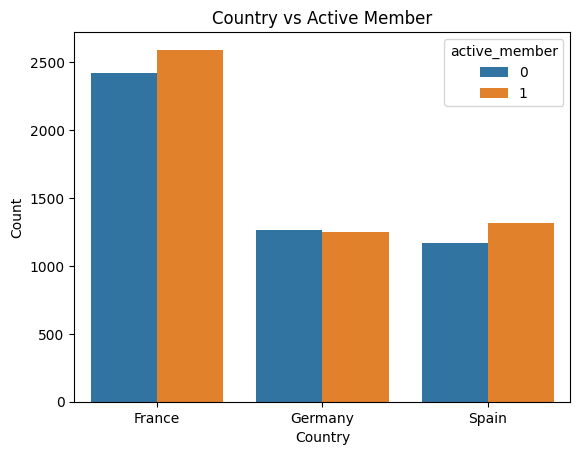

In [31]:
# Group by country and active_member
country_active = dataset.groupby(['country', 'active_member']).size().reset_index(name='count')

# Plot the bar chart
sns.barplot(x='country', y='count', hue='active_member', data=country_active)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country vs Active Member')
plt.show()


In [32]:
country_active

,country,active_member,count
0,France,0,2423
1,France,1,2591
2,Germany,0,1261
3,Germany,1,1248
4,Spain,0,1165
5,Spain,1,1312


In [33]:

# Group by age intervals and churn
#dataset['age_group'] = pd.cut(dataset['age'], bins=range(0, 101, 10))
#age_churn = dataset.groupby(['age_group', 'churn']).size().reset_index(name='count')

# Plot the bar chart
#sns.barplot(x='age_group', y='count', hue='churn', data=age_churn)
#plt.xlabel('Age Group')
#plt.ylabel('Count')
#plt.title('Age Group vs Churn')
#plt.xticks(rotation=45)
#plt.show()

In [34]:
#age_churn

<ipython-input-35-c9f46c8b0cd3>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


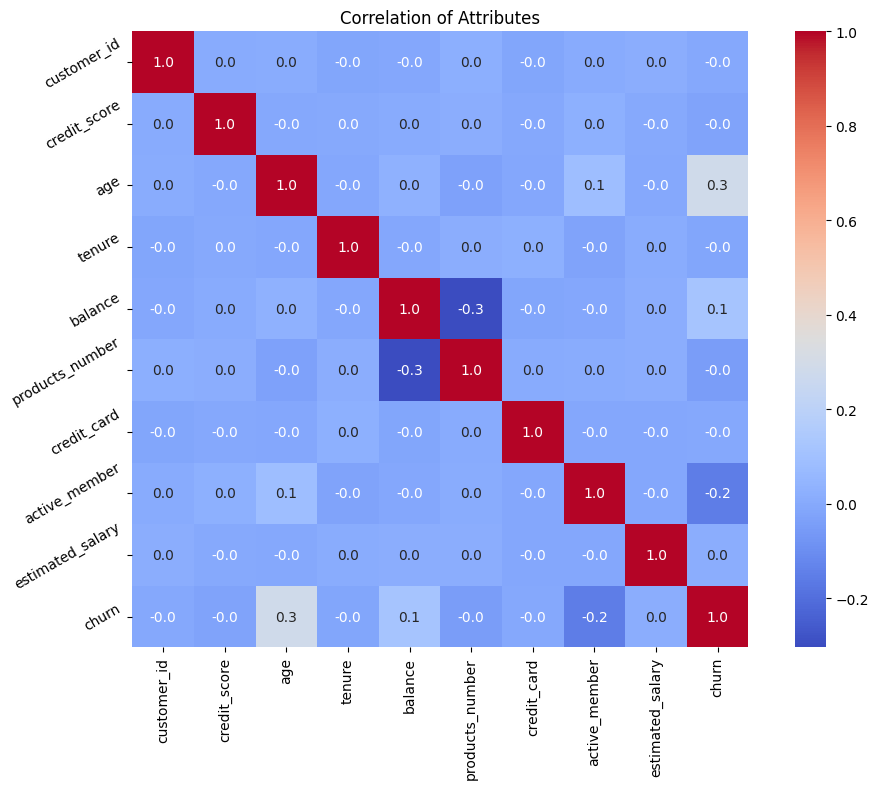

In [35]:
#creating the correlation matrix to spot relationships between the variables
#function fmt has been set to .1g so that the matrix displays with one decimal place for better readability
# annot = true helps display the correlation coefficient
#the matrix below shows there is good correlation between the variables

correlation = dataset.corr()

plt.figure(figsize=(12,8))
plt.title('Correlation of Attributes')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.1f', linecolor='white', cmap= 'coolwarm')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

MODEL TRAINING AND EVALUATION

In [36]:
# splitting the data set into features and target columns
#nnote some columns are not needed for the machine classification hence we removed them

X = dataset.iloc[:, [1,4,5,6,7,8,9,10]].values  
y = dataset.iloc[:, 11].values

In [37]:
#spitting the dataset to train set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [38]:
# Getting the Shapes of the Training and Test Data
print("------------------Multi Dimension---------------------------")
print("Shape of X_train: ", X_train.shape)
print("Number of rows in X_train: ", X_train.shape[0])
print("Number of columns in X_train: ", X_train.shape[1])
print("---------")
print("Shape of X_test: ", X_test.shape)
print("Number of rows in X_test: ", X_test.shape[0])
print("Number of columns in X_test: ", X_test.shape[1])
print("------------------Single Dimension---------------------------")
print("Shape of Y_train: ", y_train.shape)
print("Number of rows in y_train: ", y_train.shape[0])
print("Shape of y_test: ", y_test.shape)
print("Number of rows in y_test: ", y_test.shape[0])

------------------Multi Dimension---------------------------
Shape of X_train:  (7000, 8)
Number of rows in X_train:  7000
Number of columns in X_train:  8
---------
Shape of X_test:  (3000, 8)
Number of rows in X_test:  3000
Number of columns in X_test:  8
------------------Single Dimension---------------------------
Shape of Y_train:  (7000,)
Number of rows in y_train:  7000
Shape of y_test:  (3000,)
Number of rows in y_test:  3000


In [39]:
#dropping constant features with similar values and provide no information that that helps ML models to predict the target

from sklearn.feature_selection import VarianceThreshold
variance_selector = VarianceThreshold(threshold=0)  
X_train_fs = variance_selector.fit_transform(X_train)
X_test_fs = variance_selector.transform(X_test)
print(f"{X_train.shape[1]-X_train_fs.shape[1]} features have been removed, {X_train_fs.shape[1]} features remain")

0 features have been removed, 8 features remain


In [40]:
#scaling the dataset

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import RFECV

scaler = StandardScaler()
X_train_fs = scaler.fit_transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)


In [41]:
#training the model using KNN

from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=3)
classifier.fit(X_train_fs, y_train)

KNeighborsClassifier(p=3)

In [42]:
#Evaluating the model and predicting the test results

y_pred=classifier.predict(X_test_fs)
print(y_pred)

[0 0 0 ... 0 0 0]


In [61]:
y_test[654]

0

In [43]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
#Evaluating the performance of the model

from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n' %(acc))

accuracy:0.84




In [45]:
#Confusion matrix
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix')
print(cm, '\n\n')

Confusion Matrix
[[2281  135]
 [ 346  238]] 




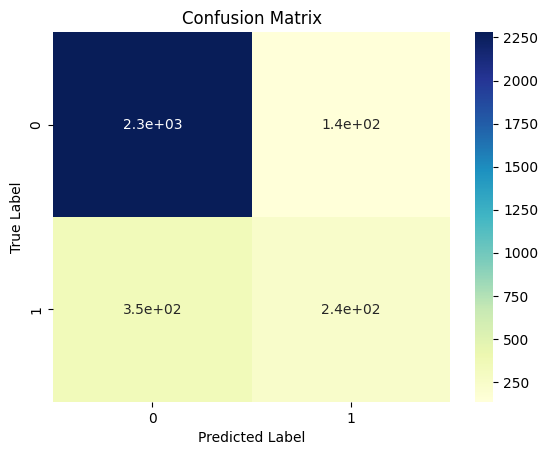

In [46]:


# Create a confusion matrix as a numpy array or a pandas DataFrame
cm=metrics.confusion_matrix(y_test,y_pred)

# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, cmap="YlGnBu")

# Set plot labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show plot
plt.show()

In [47]:
#Classification report

result=metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2416
           1       0.64      0.41      0.50       584

    accuracy                           0.84      3000
   macro avg       0.75      0.68      0.70      3000
weighted avg       0.82      0.84      0.83      3000



In [48]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [49]:
#function to perform training with entropy
clf_entropy =DecisionTreeClassifier(criterion ="entropy", random_state = 100,max_depth = 3,min_samples_leaf=5)
clf_entropy.fit(X_train_fs,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [50]:
#functiontomake predictions
y_pred_en = clf_entropy.predict(X_test_fs)
y_pred_en

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
#checking the accuracy
print("accuracy is", accuracy_score(y_test,y_pred_en)*100)

accuracy is 84.39999999999999


In [52]:
#Classification report

result=metrics.classification_report(y_test, y_pred_en)
print('Classification Report:\n')
print(result)

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2416
           1       0.86      0.24      0.37       584

    accuracy                           0.84      3000
   macro avg       0.85      0.61      0.64      3000
weighted avg       0.85      0.84      0.81      3000



In [53]:
#Confusion matrix
cm=metrics.confusion_matrix(y_test,y_pred_en)
print('Confusion Matrix')
print(cm, '\n\n')

Confusion Matrix
[[2393   23]
 [ 445  139]] 




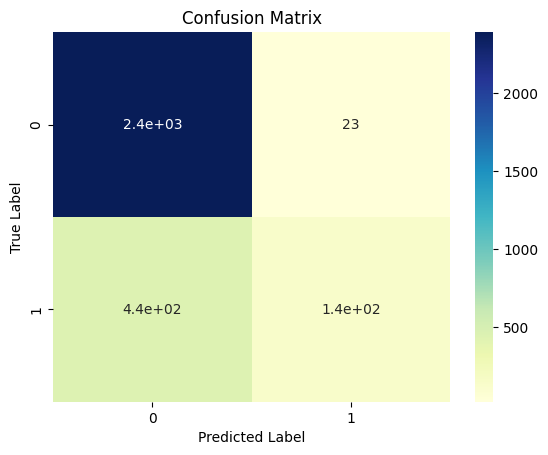

In [57]:
# Create a confusion matrix as a numpy array or a pandas DataFrame
cm=metrics.confusion_matrix(y_test,y_pred_en)

# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, cmap="YlGnBu")

# Set plot labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show plot
plt.show()